# Topovske bitke

## Nekaj dejstev o šahu 

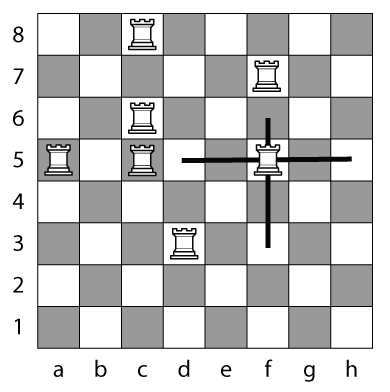

- Šahovska polja označimo s kombinacijo črke (stolpec) in številke (vrstica). c2 je tretje polje v drugi vrstici.
- V šahu se trdnjava (AKA top) pomika po stolpcih in vrsticah, ne pa diagonalno ali kako drugače. Dve trdnjavi se torej napadata, če ste v isti vrstici in stolpcu.
- Šahovske trdnjave lahko, tako kot šahovski konji, tudi preskakujejo figure. O tem dejstvu sicer nisem povsem prepričan, ampak Donald je tako napisal na Twitterju, torej mora biti res.

Običajno se v šahu napadajo bele in črne figure (tidve barvi bodo sicer nekoč zamenjali s čim nevtralnim, saj se to, da je beli lovec požrl črnega kmeta, sliši rasistično). V naši nalogi pa se bodo med seboj napadale kar bele trdnjave.


## Testi


[testi.py](https://cdn.jsdelivr.net/gh/janezd/predavanja@master/p1/domace-naloge/2020/05%20topovske%20bitke/testi.py)


## Obvezna naloga

Napiši naslednje funkcije.

### se_napadata

`se_napadata(top1, top2)` prejme koordinati dveh topov in vrne `True`, če se med seboj napadata (torej: če sta v isti vrstici ali stolpcu) in `False`, če se ne. Če gre za eno in isto trdnjavo, pa vedno vrne `False`.

Tako klica `se_napadata("a5", "a8")` in `se_napadata("c5", "f5")` vrneta `True`, klic `se_napadata("a5", "c3")` vrne `False` (ker nista ne v isti vrstici ne v istem stolpcu), klic `se_napadata("c3", "c3")` pa vrne `False`, ker gre za eno in isto trdnjavo.

#### Rešitev

Po mailih sem videl kup zanimivih idej, praviloma so se vrtele okrog -- zank `for`. Tu jih ne potrebujemo. Oziroma bo brez njih veliko lažje. Preveriti moramo, ali se niza ujemata v prvi ali v drugi črki, torej `top1[0] == top2[0] or top1[1] == top2[1]`. Poleg tega pa ne smeta biti enaka. Se pravi, `top1 != top2`.

In [1]:
def se_napadata(top1, top2):
    return (top1[0] == top2[0] or top1[1] or top2[1])  and top1 != top2

Prvo: ne pozabimo oklepajev. `and` ima prednost pred `or`. Če bi izpustili oklepaje in napisali le `top1[0] == top2[0] or top1[1] or top2[1] and top1 != top2`, bi bilo to isto kot `top1[0] == top2[0] or top1[1] or (top2[1]) and top1 != top2)`, česar pa nočemo.

Drugo: vrnemo vrednost tega izraza. Ne pa

```python
def se_napadata(top1, top2):
    if (top1[0] == top2[0] or top1[1] or top2[1]) and top1 != top2:
        return True
    else:
        return False
```

ali, kot je bil popularno med študenti

```python
def se_napadata(top1, top2):
    if top1[0] == top2[0] or top1[1] or top2[1]:
        if top1 != top2:
            return True
        else:
            return False
    else:
        return False
```

### napadeni

`napadeni(top, topovi)` prejme koordinato enega topa in seznam koordinat vseh topov na šahovnici. Vrniti mora seznam koordinat vseh topov, ki jih napada podani top.

Klic `napadeni("c3", ["c1", "c3", "d6", "c6", "e5", "a3"])` vrne `["c1", "c6", "a3"]`. Klic `napadeni("c1", ["c1", "c3", "c4", "c5"])` vrne `["c3", "c4", "c5"]`, ker topovi lahko preskakujejo druge topove.

(Napadeni topovi naj bodo našteti v enakem vrstnem redu, v katerem se pojavijo v seznamu `topovi`. S tem se ti ni treba posebej ukvarjati: če ne boš kaj brez potrebe mešal(a), se bo zgodilo samo od sebe.)

#### Rešitev

Sestavimo prazen seznam. Gremo čez vse topove v seznamu: za vsakega ugotovimo, če je napaden in če je, ga dodamo na spisek.

In [2]:
def napadeni(top, topovi):
    nap = []
    for top2 in topovi:
        if se_napadata(top, top2):
            nap.append(top2)
    return nap

Tule je predvsem pametno, da pokličemo funkcijo `se_napadata`, ki smo jo napisali prejle. Brez tega ... moramo v ta `if` pač skopirati celoten izraz iz prejšnje funkcije. Če pa smo prejšnjo funkcijo pošteno zakomplicirali in je zdaj nočemo poklicati, moramo skopirati vso tisto pošteno komplicirano kodo v to funkcijo.

### napadenost

`napadenost(top, topovi)` prejme koordinato topa in koordinate vseh topov ter vrne število topov, ki napadajo podani top. Napadenost topa f5 na sliki je 3, saj ga napadajo trije topovi (vključno s topom a5, ker lahko le-ta preskoči top c5).

#### Rešitev

Ta je preprosta: prejle smo napisali funkcijo, ki vrne vse topove, ki jih napada ta top. Natančno toliko topov napada njega. Torej moramo samo pogledati, koliko topov vrne prejšnja funkcija.

In [3]:
def napadenost(top, topovi):
    return len(napadeni(top, topovi))

Kdor meni, da še ni dovolj pameten, da bi klical funkcije, ki jih je napisal predtem, pa naj bo dovolj pameten, da jih namesto tega kopira in s tem postajajo vedno daljše. :) 

### varen    

`varen(top, topovi)` vrne `True`, če podani top ni napaden in `False`, če je. Na sliki je le en top, za katerega bi ta funkcija vrnila `True`: top d3.

#### Rešitev

Top je varen, če ga nihče ne napada. Na primer: če je njegova napadenost enaka 0. :)

In [4]:
def varen(top, topovi):
    return napadenost(top, topovi) == 0

### Najbolj napaden

`najbolj_napaden(topovi)` prejme seznam topov in vrne koordinati topa, ki ga napada največ drugih topov. Če je enako napadenih več, vrne tistega, ki je prej na seznamu. Če ni napaden nihče, vrne `None`.

Za topove na sliki ta funkcija vrne `"c5"`, saj ga napadajo štirje drugi topovi.

#### Rešitev

Po dolgem času spet funkcija, za katero je potrebno nekaj programirati. Ampak nič posebnega, nič, česar nismo že velikokrat delali: samo iskanje največjega elementa po določenem kriteriju.

In [5]:
def najbolj_napaden(topovi):
    naj_top = None
    naj_nap = 0
    for top in topovi:
        nap = napadenost(top, topovi)
        if nap > naj_nap:
            naj_nap = nap
            naj_top = top
    return naj_top

### vse_varno

`vse_varno(topovi)` vrne `True`, če noben top ne napada nobenega drugega. Na sliki ni vse varno. Nikakor.

#### Rešitev

Zeh, zeh.

In [6]:
def vse_varno(topovi):
    return najbolj_napaden(topovi) == None

## Dodatna naloga

Donald je priznal napako. No, v resnici je ni, fake news, ampak vseeno: topovi se ne morejo preskakovati. 

Napiši funkcijo `direkten_napad(top1, top2, topovi)`, ki prejme koordinati dveh topov in seznam vseh topov. Funkcija vrne `True`, če se `top1` in `top2` napadata - seveda tako, da med njima ni nobenega drugega topa.

Funkcija, ki smo jo napisali prej, bi za topa a5 in f5 vrnila `True`, četudi je med njima top na c5. Funkcija, ki jo pišemo zdaj, pa mora v takem primeru vrniti `False`.

### Rešitev

Tule je pa treba malo razmisliti. Zato pa je to dodatna naloga.

Sam sem napisal precej daljšo rešitev, kar nekaj študentov pa je razmišljalo preprosteje in sestavilo krajšo. Objavljam eno od njih.

In [5]:
def direkten_napad(top1, top2, topovi):
    for top in topovi:
        if (top[0] == top1[0] == top2[0] or top[1] == top1[1] == top2[1]) \
                and (top1 < top < top2 or top2 < top < top1):
            return False
    return se_napadata(top1, top2)

Najprej poskušamo odkriti, ali je med `top1` in `top2` kak drug top. Če najdemo top, ki je v isti vrstici kot tadva ali v istem stolpcu kot tadva, in je po abecedi med njima, vrnemo `False`. Sicer vrnemo ali se napadata ali ne.

Zanimiva je predvsem tretja vrstica. Vemo že, da sta v isti vrstici ali stolpcu. Če se ujemata v prvem znaku, so to lahko, recimo, a5, a7 in a8. Ko jih primerja, v bistvu zanemari prvi znak (saj je pri vseh enak) in primerja le drugega. Lahko pa se ujemata po drugem znaku in imamo, na primer, c3, d3 in g3. V tem primeru jih primerja po prvem znaku.